In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

DATA PREPROCESSING

In [36]:
df=pd.read_csv("usa_rain_prediction_dataset_2024_2025.csv")
df = df.drop(df.index[-1])
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73094,2025-12-26,Washington D.C.,58.711307,92.273690,7.199619,0.034771,93.772077,1012.351873,0
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1


In [37]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73099.000000,73099.000000,73099.000000,73099.000000,73099.000000,73099.000000,73099.000000
mean,65.182414,59.874755,15.017841,0.390639,54.943289,1005.176428,0.220413
std,20.205894,23.066142,8.668741,0.474835,25.982337,20.203715,0.414528
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678891,39.800627,7.485128,0.000000,32.319281,987.697920,0.000000
50%,65.295286,59.887234,15.102477,0.196945,55.011604,1005.284689,0.000000
75%,82.636829,79.834888,22.551625,0.673178,77.412942,1022.728873,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [38]:
df.isnull().sum()
df['Rain Tomorrow'].notna().sum()

np.int64(73099)

In [39]:
num_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

df['Rain Tomorrow'] = df['Rain Tomorrow'].map({0.0: 0, 1.0: 1})

df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

DATA VISUALIZATION

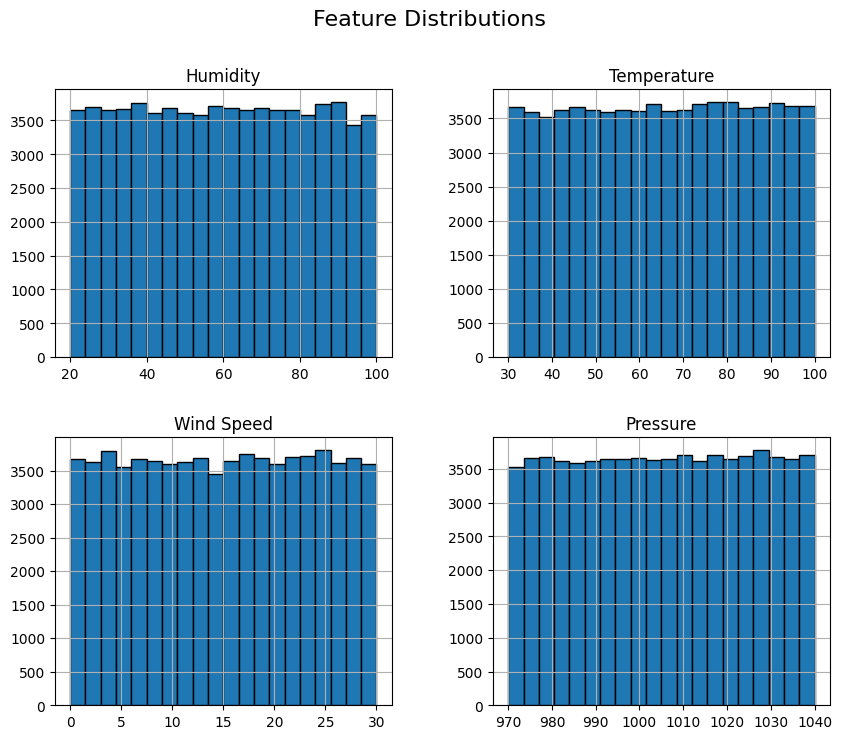

In [50]:
df[['Humidity', 'Temperature', 'Wind Speed', 'Pressure']].hist(figsize=(10,8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

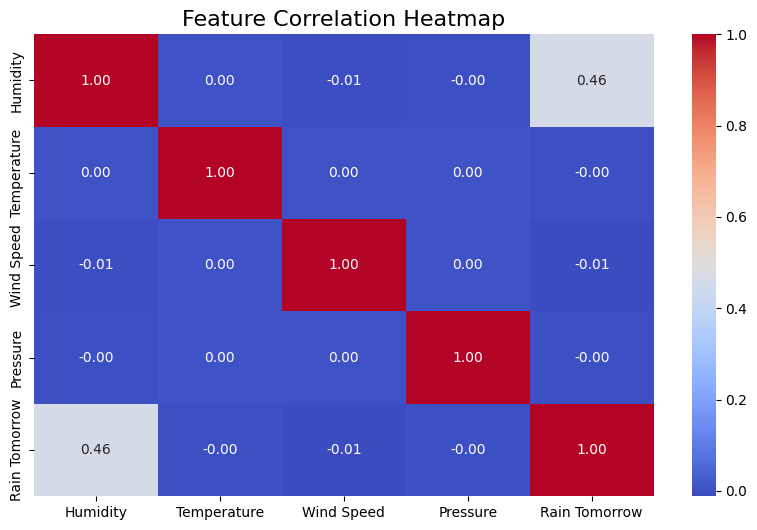

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Humidity', 'Temperature', 'Wind Speed', 'Pressure', 'Rain Tomorrow']].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

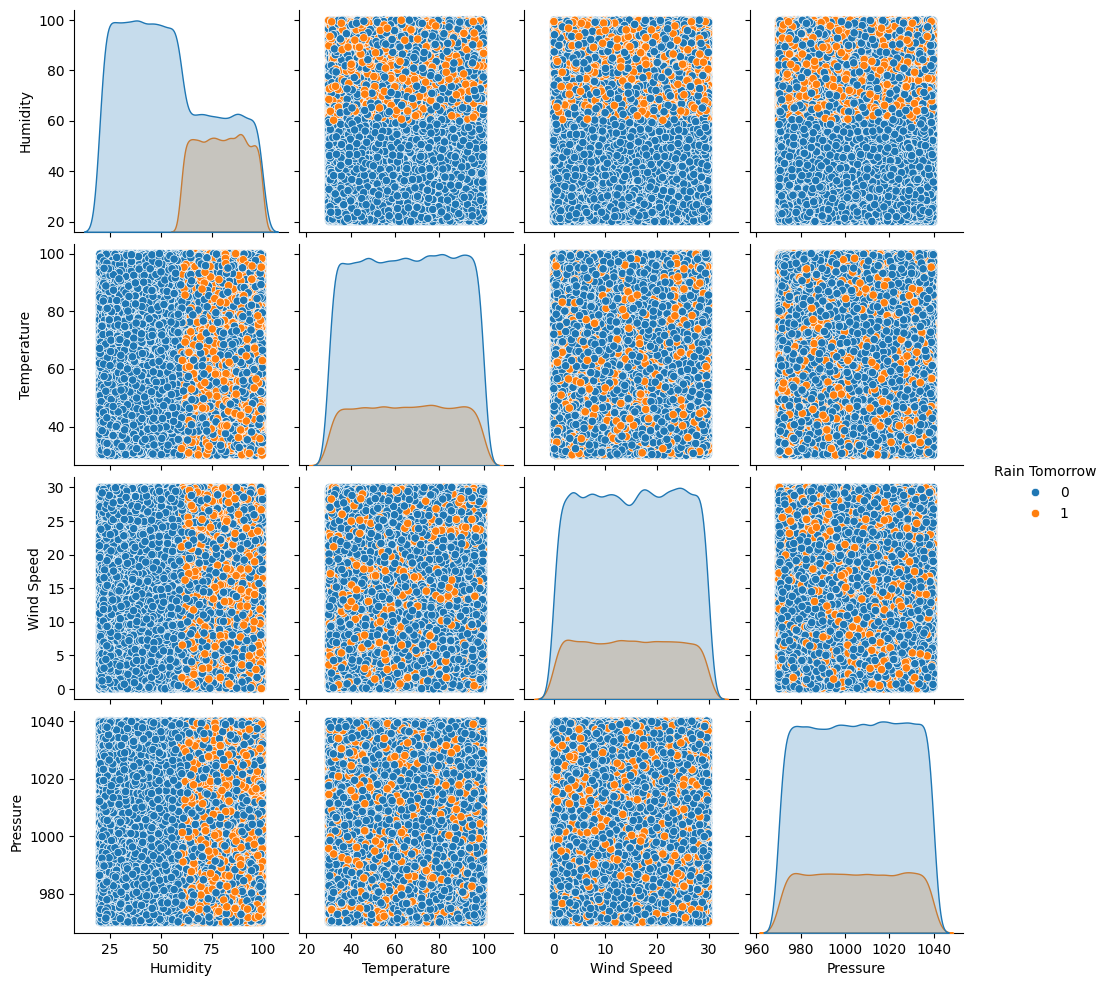

In [54]:
sns.pairplot(df[['Humidity', 'Temperature', 'Wind Speed', 'Pressure', 'Rain Tomorrow']], hue='Rain Tomorrow')
plt.show()

ADDING FEATURE

In [58]:
df['humidity_Temperature'] = df['Humidity'] * df['Temperature']
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,humidity_Temperature
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,6621.728203
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,2390.593142
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,5240.256547
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,4665.468416
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,1288.455717
...,...,...,...,...,...,...,...,...,...,...
73094,2025-12-26,Washington D.C.,58.711307,92.273690,7.199619,0.034771,93.772077,1012.351873,0,5417.508941
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0,2643.974157
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0,1611.388329
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1,5465.106335


MODELING

In [40]:
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]
y = df['Rain Tomorrow']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [42]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [61]:
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]
y = df['Rain Tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
MAE=np.mean(np.abs(y_test - y_pred))

print("RMSE:",rmse)
print("R2 Score:", r2)
print("MAE:",MAE)

RMSE: 0.3061414835343342
R2 Score: 0.4583560335302903
MAE: 0.24858387944370292


In [45]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9129274965800274
Confusion Matrix:
 [[11299    67]
 [ 1206  2048]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     11366
           1       0.97      0.63      0.76      3254

    accuracy                           0.91     14620
   macro avg       0.94      0.81      0.85     14620
weighted avg       0.92      0.91      0.91     14620



In [ ]:
columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

custom_input = pd.DataFrame([[28, 75, 12, 0, 40, 1010]], columns=columns)
custom_prediction = nb_model.predict(custom_input)[0]

result = "Yes, it will rain tomorrow." if custom_prediction == 1 else "No, it will not rain tomorrow."
print(result)

No, it will not rain tomorrow.


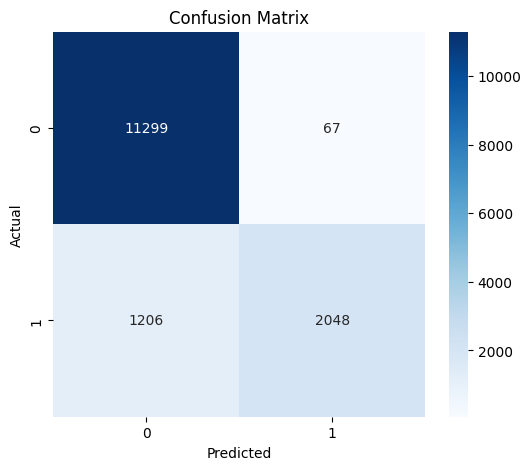

In [ ]:
y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DEPLOYMENT

In [62]:
import pickle

with open("naive_bayes_weather_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)